# Image Classification Using Neural Network 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [2]:
classes = os.listdir("Top Techies/Train")
classes

['Mark', 'Musk', 'Pillamgolla Akhil', 'Ryan', 'Safra', 'Satya']

In [3]:
# this will count the number of images in Train Folder
print("Training Data:")
for f in classes:
    path = "Top Techies/Train/" + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data:
Mark - 9
Musk - 9
Pillamgolla Akhil - 10
Ryan - 9
Safra - 10
Satya - 10


In [4]:
# this will count the number of images in Test Folder
print("Test Data:")
for f in classes:
    path = "Top Techies/Test/" + f
    print(f"{f} - {len(os.listdir(path))}")

Test Data:
Mark - 3
Musk - 3
Pillamgolla Akhil - 3
Ryan - 3
Safra - 3
Satya - 3


# Data Loading

We need to load the data as we have unstructured data.

`Unstructured Data -> Structured Data (Tabular Format)`

Here we need to convert the folders that we have into X,y

In [8]:
#! pip install keras_preprocessing

In [9]:
from keras_preprocessing import image
# this help in conversion of data that is in folder format to structured format.
# using image - we can load image , converting image to different colours.

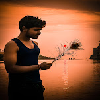

In [10]:
# printing of image 
path = 'Top Techies/Train/Pillamgolla Akhil/1.jpg'
img = image.load_img(path, target_size=(100,100))
img

In [11]:
train_data = [] # X
train_labels = [] # Y

for category in classes: # here we have 3 classes - Pikachu , charmander & Bulbasour  
    folder = f"Top Techies/Train/{category}"
    for img_name in os.listdir(folder): # here image_name will be refering to pokemon values.
        img_path = f"{folder}/{img_name}"
        
        img = image.load_img(img_path, target_size=(100,100))
        # here height , width is 100, 100 is dimention for all images 
        img = image.img_to_array(img) # image -(converted)> array
        # if you try to print img that will be numpy array
        train_data.append(img)
        train_labels.append(category)
        

In [12]:
img.shape # (height, width , Channel)
# Channel - RGB

(100, 100, 3)

In [13]:
len(train_data) # total no of images 

57

In [14]:
len(train_labels) # total no of labels 

57

# Data Preprocessing

In [120]:
# the data  is in format of list 
# list -(Converted)-> Numpy Array
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [121]:
train_data.shape # we need to reshape this data as this is not desired train_data

(57, 100, 100, 3)

In [122]:
train_labels.shape

(57,)

In [123]:
train_data = train_data.reshape(len(train_data), 30000) # in place of 30k we can also write -1
# -1 will take all the remaining vlaues
train_data.shape # (30k = 100*100*3)

(57, 30000)

`As ml cannot take text data we will convert that into numbers`

In [124]:
category2label = {'Mark':0, 'Musk':1, 'Pillamgolla Akhil':2,'Ryan':3,'Safra':4,'Satya':5} 
# we use this for convertion of category to label
label2category = {0: 'Mark', 1: 'Musk', 2:'Pillamgolla Akhil','Ryan':3,'Safra':4,'Satya':5}
# we use this for convertion of label to category  

In [125]:
train_labels = np.array([category2label[label] for label in train_labels])

In [126]:
train_labels.shape # here we need to convert into 1 hot encoding

(57,)

In [127]:
# ! pip install keras.utils

In [128]:
from keras.utils import to_categorical # we will convert into 1 hot encoding

In [129]:
train_labels = to_categorical(train_labels)

In [130]:
train_labels.shape

(57, 6)

In [131]:
train_labels[:5] # seeing top 4 values 
# pikacu - no | Charmander - Yes | bulbasour - No

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [132]:
train_labels[-5:] # last 5 values 
# this belong to pikachu

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Model Architecture

`For multiclass Classification we will use the softmax`

`Soft max can give the probability distribution for all the 3 classes `

In [133]:
from keras.layers import Dense
from keras import Sequential

In [134]:
features = train_data.shape[1]

In [135]:
model = Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)) )
model.add( Dense(units=256, activation='relu' ) ) 
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=6, activation='softmax' ) )  

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [136]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,533,382 (59.26 MB)

 Trainable params: 15,533,382 (59.26 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.2120 - loss: 375.0246
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.1248 - loss: 2642.8279
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2705 - loss: 3187.1279
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2237 - loss: 1245.5762
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2783 - loss: 762.3387
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1457 - loss: 1098.3765
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2029 - loss: 1143.2489
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2379 - loss: 856.8998
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.3693 - loss: 575.2964
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3264 - loss: 244.1863
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5384 - loss: 280.5457
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accurac

# Test data

In [138]:
test_data = [] # X
test_labels = [] # Y

for category in classes:
    folder = f"Top Techies/Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [139]:
len(test_data)

18

In [140]:
# converting the data to numpy array
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [141]:
test_data.shape

(18, 100, 100, 3)

In [142]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(18, 6)

In [143]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(18, 30000)

In [144]:
model.evaluate(test_data, test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8889 - loss: 72.1976


[72.19759368896484, 0.8888888955116272]

In [145]:
pred = model.predict(test_data).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [146]:
pred[:10] # this will give me top 10 prediction of pokemon

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 3], dtype=int64)

# Prediction for 1 image

In [214]:
test_img = "Top Techies/Test/Mark/1.jpg"

img = image.load_img(test_img, target_size=(1000,1000))
img = image.img_to_array(img)
img.shape

(1000, 1000, 3)

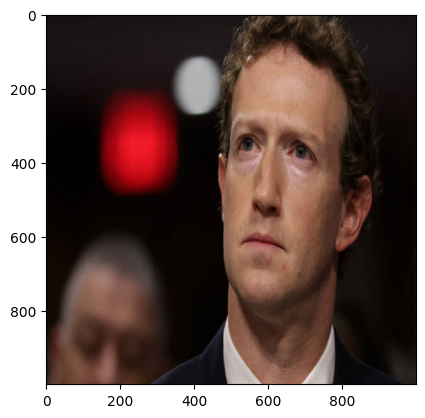

In [215]:
plt.imshow(img.astype('int')); 

In [212]:
img = img.reshape(1, 30000)
img.shape 

(1, 30000)

In [213]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'Mark'